In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/content/spam.csv",encoding = 'latin-1')
print(data.head())
data.shape
data=data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
print(data)

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                       

In [ ]:
! pip install nltk

In [ ]:
! pip install wordcloud

In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [34]:
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer

<ipython-input-5-ea54957273ee>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  fg=sns.countplot(x=data['v1'],legend = False,palette=cols)


Text(0, 0.5, 'Number of data points')

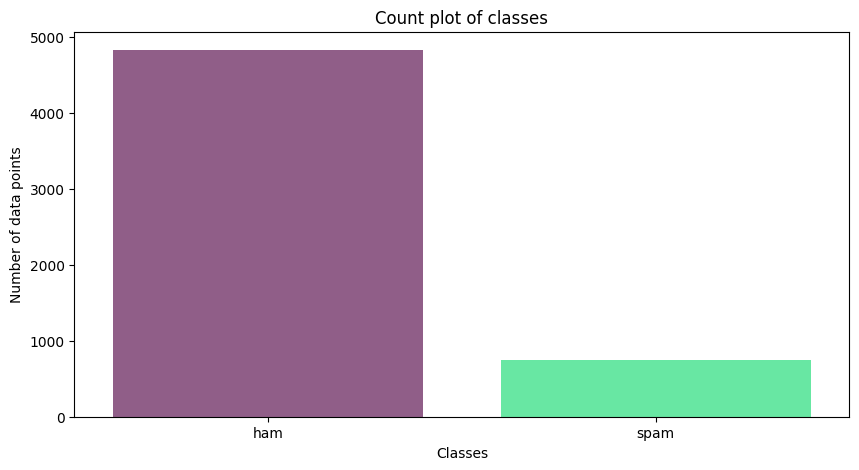

In [5]:
cols= ["#98568d", "#53fca1"]
plt.figure(figsize=(10,5))
fg=sns.countplot(x=data['v1'],legend = False,palette=cols)
fg.set_title("Count plot of classes")
fg.set_xlabel("Classes")
fg.set_ylabel("Number of data points")


For the purpose of data exploration, I am creating new features

No_of_Characters: Number of characters in the text message |
No_of_Words: Number of words in the text message |
No_of_sentence: Number of sentences in the text message.

In [6]:
nltk.download('punkt')
data["No_of_Characters"] = data['v2'].apply(len)
data["No_of_Words"]=data.apply(lambda row: nltk.word_tokenize(row['v2']), axis=1).apply(len)
data["No_of_sentence"]=data.apply(lambda row: nltk.sent_tokenize(row['v2']), axis=1).apply(len)
data.describe().T

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,count,mean,std,min,25%,50%,75%,max
No_of_Characters,5572.0,80.118808,59.690841,2.0,36.0,61.0,121.0,910.0
No_of_Words,5572.0,18.699390,13.741932,1.0,9.0,15.0,27.0,220.0
No_of_sentence,5572.0,1.996411,1.520159,1.0,1.0,1.5,2.0,38.0


<Figure size 1000x1000 with 0 Axes>

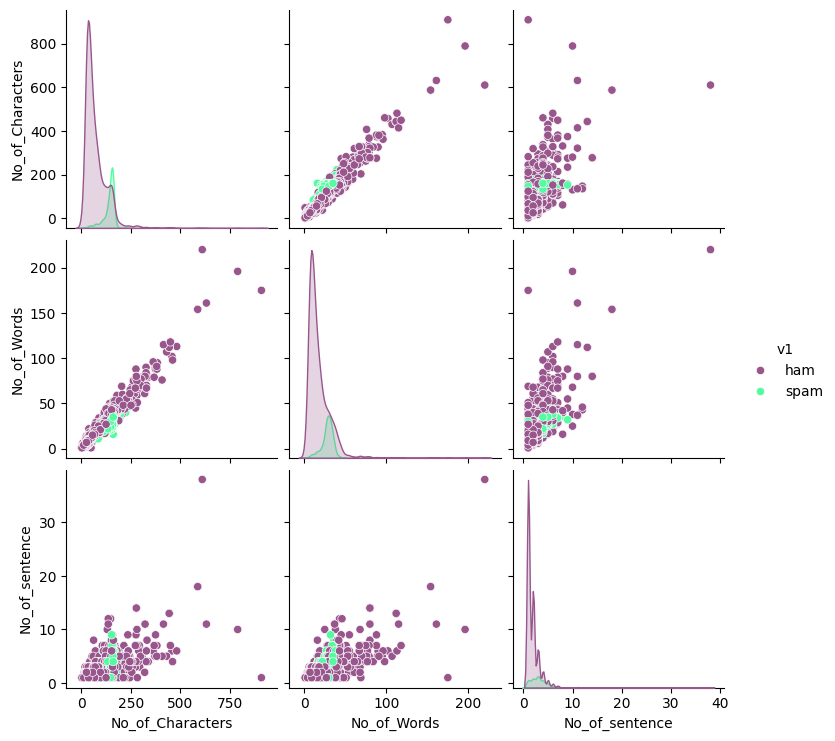

In [7]:
plt.figure(figsize=(10,10))
fg= sns.pairplot(data=data,hue="v1",palette=cols)
plt.show(fg)

In [11]:
#dropping the outliers
data=data[(data['No_of_Characters']<350)]
data.shape

(5548, 5)

<Figure size 1000x1000 with 0 Axes>

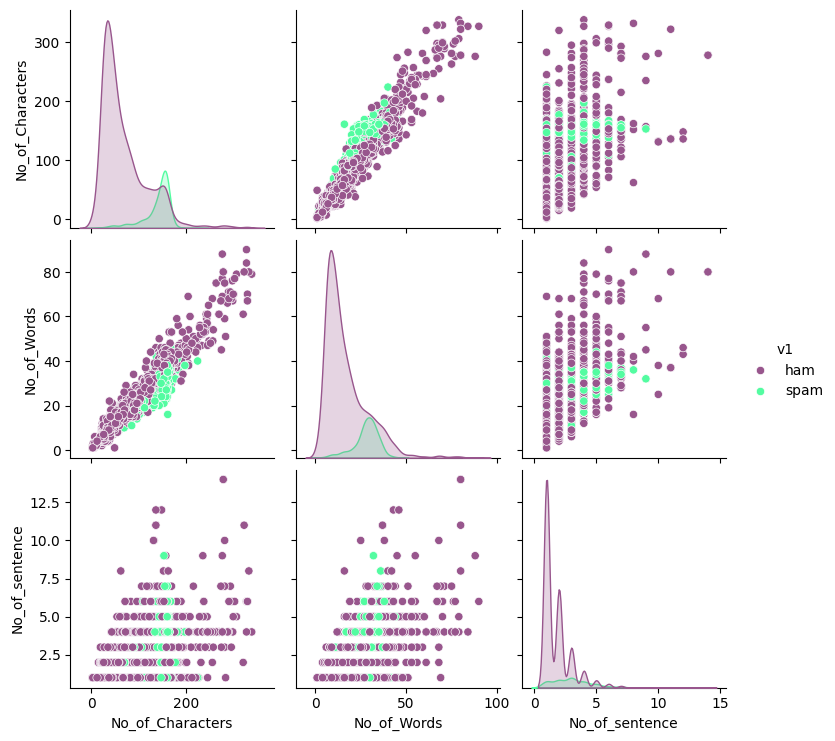

In [13]:
plt.figure(figsize=(10,10))
fg=sns.pairplot(data=data,hue='v1',palette=cols)
plt.show(fg)

Spam


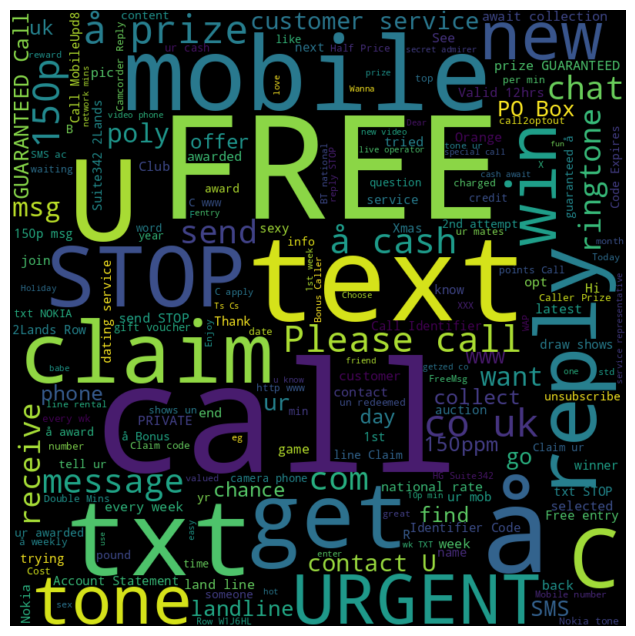

ham


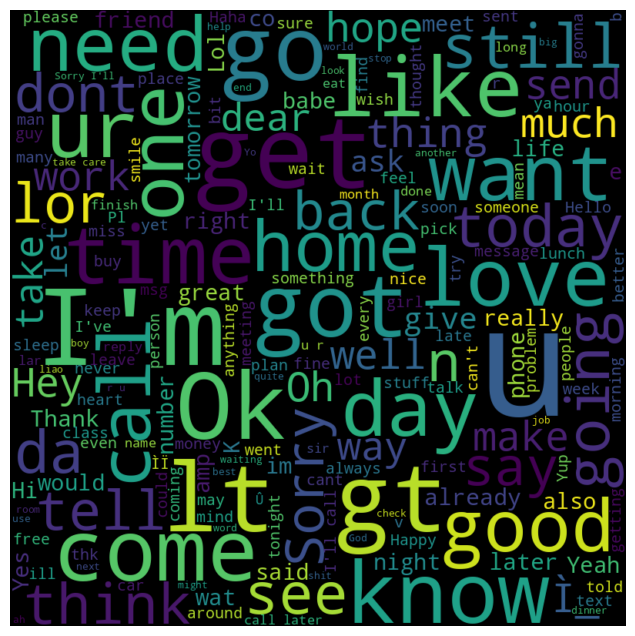

In [10]:
stop_word = set(stopwords.words('english'))
word_cloud=WordCloud(width =800,height=800,max_words=200,stopwords=stop_word,background_color='black',max_font_size=200)
spam = data.query("v1=='spam'").v2.str.cat(sep=' ')
ham = data.query("v1=='ham'").v2.str.cat(sep=' ')

print("Spam")
word_cloud.generate(spam)
plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

print("ham")
word_cloud.generate(ham)
plt.figure(figsize=(16,8))
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()


#cleaning text

In [14]:
print("The first 5 texts:",*data['v2'][:5],sep="\n")

The first 5 texts:
Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though


In [18]:
#defining a function to clean the text
import re
def Cleaning(v2):
  sms=re.sub('[^a-zA-Z]',' ',v2) #replacing all non-alphabetic character with space
  sms=sms.lower()
  sms=sms.split()
  sms=' '.join(sms)
  return sms
data["clean_text"]=data["v2"].apply(Cleaning)
print("The first 5 text after cleaning ",*data['clean_text'][:5],sep='\n')

The first 5 text after cleaning 
go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
ok lar joking wif u oni
free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry question std txt rate t c s apply over s
u dun say so early hor u c already then say
nah i don t think he goes to usf he lives around here though


In [21]:
#tokenization
data["Tokenize_text"]=data.apply(lambda row: nltk.word_tokenize(row['clean_text']),axis=1)
print(data["Tokenize_text"])
print("The first 5 text after tokenizing: ",*data['Tokenize_text'][:5],sep='\n')

0       [go, until, jurong, point, crazy, available, o...
1                          [ok, lar, joking, wif, u, oni]
2       [free, entry, in, a, wkly, comp, to, win, fa, ...
3       [u, dun, say, so, early, hor, u, c, already, t...
4       [nah, i, don, t, think, he, goes, to, usf, he,...
                              ...                        
5567    [this, is, the, nd, time, we, have, tried, con...
5568            [will, b, going, to, esplanade, fr, home]
5569    [pity, was, in, mood, for, that, so, any, othe...
5570    [the, guy, did, some, bitching, but, i, acted,...
5571                     [rofl, its, true, to, its, name]
Name: Tokenize_text, Length: 5548, dtype: object
The first 5 text after tokenizing: 
['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'in', 'a', 'wkly', 'comp', 'to', 'win', 'fa', 'cup',

In [33]:
#Removing stopwords function
def remove_stopword(v2):
  stop_word=set(stopwords.words('english'))
  filtered_text=[]
  for word in v2:
    if word not in stop_word:
      filtered_text.append(word)
  return filtered_text
data["Nostopwords"]=data["Tokenize_text"].apply(remove_stopword)
print("First 5 text after removing stopword: ",*data['Nostopwords'][:5],sep='\n')

First 5 text after removing stopword: 
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat']
['ok', 'lar', 'joking', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'goes', 'usf', 'lives', 'around', 'though']


In [39]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [53]:
lemmatizer = WordNetLemmatizer()
def lemmatize_word(v2):
    lemmas = []
    for word in v2:
      lemma = lemmatizer.lemmatize(word, pos='v')
      lemmas.append(lemma)
    #lemmas = [lemmatizer.lemmatize(word, pos ='v') for word in v2]
    return lemmas

data["Lemmatized_text"] = data["Nostopwords"].apply(lemmatize_word)
print("The First 5 Texts after lemitization: ",*data["Lemmatized_text"][:5], sep = "\n")

The First 5 Texts after lemitization: 
['go', 'jurong', 'point', 'crazy', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'get', 'amore', 'wat']
['ok', 'lar', 'joke', 'wif', 'u', 'oni']
['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'st', 'may', 'text', 'fa', 'receive', 'entry', 'question', 'std', 'txt', 'rate', 'c', 'apply']
['u', 'dun', 'say', 'early', 'hor', 'u', 'c', 'already', 'say']
['nah', 'think', 'go', 'usf', 'live', 'around', 'though']


#TF-IDF
TF-IDF in NLP stands for Term Frequency – Inverse document frequency. In NLP cleaned data needs to be converted into a numerical format where each word is represented by a matrix. This is also known as word embedding or Word vectorization.

In [58]:
#Creating a corpus of text feature to encode further into vectorized form
corpus=[]
for i in data['Lemmatized_text']:
  msg = ' '.join([row for row in i])
  corpus.append(msg)
corpus[:5]
print("The first 5 lines in corpus : ",*corpus[:5],sep='\n')

The first 5 lines in corpus : 
go jurong point crazy available bugis n great world la e buffet cine get amore wat
ok lar joke wif u oni
free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply
u dun say early hor u c already say
nah think go usf live around though


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [62]:
tfidf = TfidfVectorizer()
x=tfidf.fit_transform(corpus).toarray()
x.dtype

dtype('float64')

In [64]:
label_encoder=LabelEncoder()
data['v1']=label_encoder.fit_transform(data['v1'])
#print(data.head)

In [66]:
y=data['v1']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print("Traning set shape ",x_train.shape)
print("testing set shape ",x_test.shape)

Traning set shape  (4438, 6482)
testing set shape  (1110, 6482)


In [79]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy 0.9828828828828828
Classification Report :
                precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       974
        Spam       0.99      0.87      0.93       136

    accuracy                           0.98      1110
   macro avg       0.99      0.93      0.96      1110
weighted avg       0.98      0.98      0.98      1110



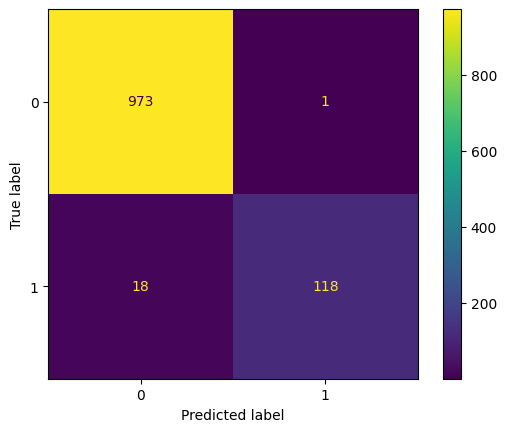

In [80]:
svm_model=SVC(kernel='linear',random_state=42)
svm_model.fit(x_train,y_train)
y_pred=svm_model.predict(x_test)
accuracy_svm=accuracy_score(y_test,y_pred)
classification=classification_report(y_test,y_pred,target_names=['Ham','Spam'])
print("Accuracy",accuracy_svm)
print("Classification Report :\n ",classification)

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

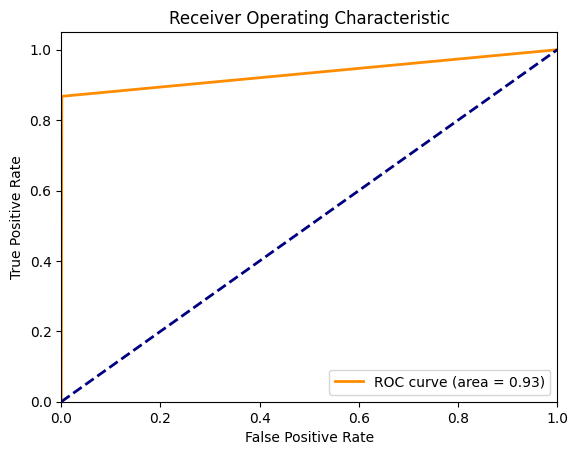

AUC: 0.9333101823891775


In [81]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()
roc_auc = auc(fpr, tpr)
print("AUC:", roc_auc)
